In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

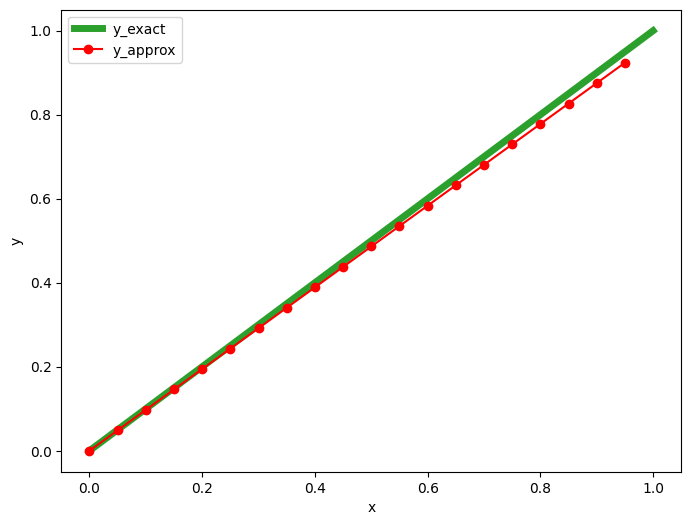

In [2]:
f = lambda x: 5/6 * x
Lambda = 1/2
K = lambda x, s: x * s

h = 0.05
x1 = np.arange(0, 1, h).reshape(-1, 1) # Переводим в вектор-столбец
n = len(x1)

# Заполнение матрицы X
X = np.eye(n)  # Инициализация единичной матрицы
for j in range(n):
    weight = 1/2 if j == 0 or j == n-1 else 1 # Обработка крайних значений
    for i in range(n):
        X[i, j] -= h * Lambda * weight * K(x1[i][0], x1[j][0])

Y = f(x1)
# Решение системы уравнений
approx1 = np.linalg.solve(X, Y)
# строим график
x1_exact = np.linspace(0, 1, 10)
exact1 = x1_exact

plt.figure(figsize=(8, 6))
plt.plot(x1_exact, exact1, color='C2', linewidth=5, label='y_exact')
plt.plot(x1, approx1, '-or', label='y_approx')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

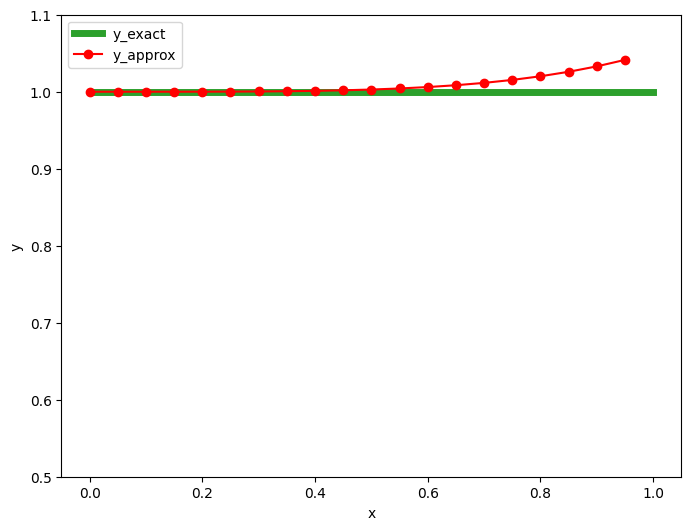

In [3]:
# Ряд Тейлора
def alpha(t):
    return [t**2, t**3, t**4, t**5]

def beta(t):
    return [t, 1/2*t**2, 1/6*t**3, 1/24*t**4]

def bfun(t, m, f):
    return beta(t)[m]*f(t)

def Aijfun(t, m, k):
    return beta(t)[m]*alpha(t)[k]

a2 = 0
b2 = 1
Lambda = -1
x2 = np.arange(a2, b2, h)
f = lambda t: np.exp(t) - t

n = len(alpha(0))
X = np.eye(n)
Y = np.zeros((n, 1))

for i in range(n):
    Y[i] = quad(bfun, a2, b2, args=(i, f))[0]
    for j in range(n):
        X[i][j] -= Lambda * quad(Aijfun, a2, b2, args=(i, j))[0]

C = np.linalg.solve(X, Y)
approx2 = f(x2) + Lambda * sum(C[i]*alpha(x2)[i] for i in range(2))
# строим график
x2_exact = np.linspace(a2, b2, 10)
exact2 = np.ones(len(x2_exact))

plt.figure(figsize=(8, 6))
plt.plot(x2_exact, exact2, color='C2', linewidth=5, label='y_exact')
plt.plot(x2, approx2, '-or', label='y_approx')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(0.5, 1.1)
plt.show()



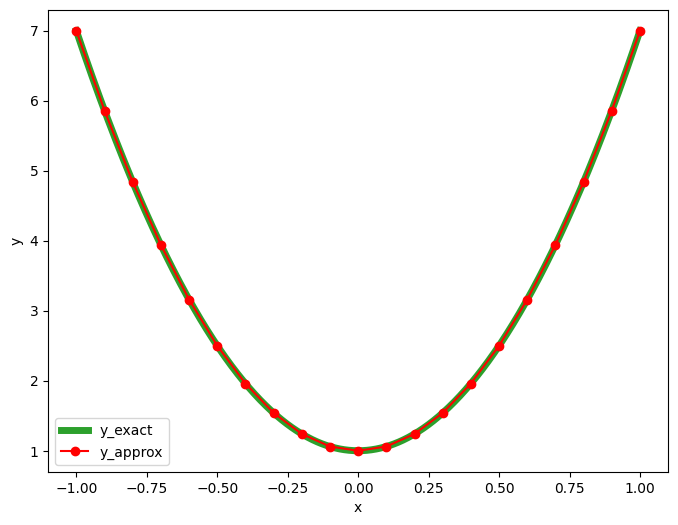

In [4]:
def galkin_petrov(X, Y, psi, phi, K, f, Lambda, a=-1, b=1):
    for i in range(2):
        Y[i] = -Lambda * quad(lambda x: psi[i](x) * quad(lambda s: K(x, s) * f(s), a, b)[0], a, b)[0]
        for j in range(2):
            X[i][j] = quad(lambda x: phi[i](x) * psi[j](x), a, b)[0] + \
                Lambda * quad(lambda x: psi[i](x) * quad(lambda s: K(x, s) * phi[j](s), a, b)[0], a, b)[0]

    return X, Y

phi = [
   lambda x: x,
   lambda x: x**2
]
psi = [
    lambda x: 1,
    lambda x: x
]

K = lambda x, s: (x**2 + x*s)
f = lambda x: 1
Lambda = -1

X = np.zeros([2, 2])
Y = np.zeros(2)

X, Y = galkin_petrov(X=X, Y=Y, psi=psi, phi=phi, K=K, Lambda=Lambda, f=f)

x3 = np.linspace(-1, 1, 21)
c = np.linalg.solve(X, Y)

# строим график
x3_exact = np.linspace(-1, 1, 1000)
exact3 = 1 + 6 * x3_exact**2

plt.figure(figsize=(8, 6))
plt.plot(x3_exact, exact3, color='C2', linewidth=5, label='y_exact')
plt.plot(x3, 1 + c[0] * phi[0](x3) + c[1] * phi[1](x3), '-or', label='y_approx')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()